In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import os

path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'

# Modeling
## Data 생성 

In [10]:
#Real distance 으로 추출한 RSSI 그래프 
import pandas as pd
#데이터 불러오는 코드  
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528.csv', '30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
#print(dataframes[2])
dataframes = []
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)
# 데이터프레임 추출
rssi = pd.DataFrame(dataframes[0]['rssi'][0:63437])
estdist = pd.DataFrame(dataframes[0]['est_dist'][0:63437])
txpower = pd.DataFrame(dataframes[0]['txpower'][0:63437])
time = pd.DataFrame(dataframes[0]['time'][0:63437])
realdist = pd.DataFrame(dataframes[0]['real_dist'][0:63437])

rssi1 = pd.DataFrame(dataframes[1]['rssi'][0:63437])
estdist1 = pd.DataFrame(dataframes[1]['est_dist'][0:63437])
txpower1 = pd.DataFrame(dataframes[1]['txpower'][0:63437])
time1 = pd.DataFrame(dataframes[1]['time'][0:63437])
realdist1 = pd.DataFrame(dataframes[1]['real_dist'][0:63437])

#print(estdist1
#print(txpower1)
rssi2 = pd.DataFrame(dataframes[2]['rssi'][0:55919])
estdist2 = pd.DataFrame(dataframes[2]['est_dist'][0:55919])
txpower2 = pd.DataFrame(dataframes[2]['txpower'][0:55919])
time2 = pd.DataFrame(dataframes[2]['time'][0:55919])
realdist2 = pd.DataFrame(dataframes[2]['real_dist'][0:55919])

rssi3 = pd.DataFrame(dataframes[3]['rssi'][0:64332])
estdist3 = pd.DataFrame(dataframes[3]['est_dist'][0:64332])
txpower3 = pd.DataFrame(dataframes[3]['txpower'][0:64332])
time3 = pd.DataFrame(dataframes[3]['time'][0:64332])
realdist3 = pd.DataFrame(dataframes[3]['real_dist'][0:64332])

rssi4 = pd.DataFrame(dataframes[4]['rssi'][0:54417])
estdist4 = pd.DataFrame(dataframes[4]['est_dist'][0:54417])
txpower4 = pd.DataFrame(dataframes[4]['txpower'][0:54417])
time4 = pd.DataFrame(dataframes[4]['time'][0:54417])
realdist4 = pd.DataFrame(dataframes[4]['real_dist'][0:54417])

rssi5 = pd.DataFrame(dataframes[5]['rssi'][0:58881])
estdist5 = pd.DataFrame(dataframes[5]['est_dist'][0:58881])
txpower5 = pd.DataFrame(dataframes[5]['txpower'][0:58881])
time5 = pd.DataFrame(dataframes[5]['time'][0:58881])
realdist5 = pd.DataFrame(dataframes[5]['real_dist'][0:58881])

rssi6 = pd.DataFrame(dataframes[6]['rssi'][0:53732])
estdist6 = pd.DataFrame(dataframes[6]['est_dist'][0:53732])
txpower6 = pd.DataFrame(dataframes[6]['txpower'][0:53732])
time6 = pd.DataFrame(dataframes[6]['time'][0:53732])
realdist6 = pd.DataFrame(dataframes[6]['real_dist'][0:53732])

#데이터 프레임 합치기
# rssi 데이터 합치기
rssi_all = pd.concat([rssi, rssi1, rssi2, rssi3, rssi4, rssi5, rssi6], ignore_index=True , axis=0)
#print(realdist)
# estdist 데이터 합치기
estdist_all = pd.concat([estdist, estdist1, estdist2, estdist3, estdist4, estdist5, estdist6], ignore_index=True, axis = 0)

#tx_power 데이터 합치기
txpower_all = pd.concat([txpower, txpower1, txpower2, txpower3, txpower4, txpower5, txpower6], ignore_index=True, axis = 0)
#time 데이터 합치
time_all = pd.concat([time,time1,time2,time3,time4,time5,time6],ignore_index=True,axis=0)

# realdist 데이터 합치기
realdist_all = pd.concat([realdist, realdist1, realdist2, realdist3, realdist4, realdist5, realdist6], ignore_index=True, axis = 0)

# 두 데이터를 하나의 데이터프레임으로 만들기
model_data = pd.DataFrame()
model_data['t_rssi'] = rssi_all
model_data['t_estdist'] = estdist_all
model_data['txpower'] = txpower_all
model_data['time'] = time_all
model_data['t_realdist'] = realdist_all

print(txpower_all)
print(len(txpower_all))

#print(final_data)
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
model_data.to_csv(file_path + 'data.csv', index=False)

#데이터 프레임 각 컬럼 별 선언 
t_rssi = pd.DataFrame(model_data['t_rssi'])
t_estdist = pd.DataFrame(model_data['t_estdist'])
t_power = pd.DataFrame(model_data['txpower'])
t_time = pd.DataFrame(model_data['time'])
t_realdist = pd.DataFrame(model_data['t_realdist'])


print(model_data)
print(len(t_estdist))
print(len(t_power))
#print(len(t_time))

        txpower
0           -59
1           -59
2           -59
3           -59
4           -59
...         ...
414150      -59
414151      -59
414152      -59
414153      -59
414154      -59

[414155 rows x 1 columns]
414155
        t_rssi  t_estdist  txpower              time  t_realdist
0          -64       1.82      -59  2021.11.16 14:20           1
1          -62       1.59      -59  2021.11.16 14:20           1
2          -65       1.94      -59  2021.11.16 14:20           1
3          -64       1.82      -59  2021.11.16 14:20           1
4          -66       2.08      -59  2021.11.16 14:20           1
...        ...        ...      ...               ...         ...
414150     -85       7.34      -59   2021.11.17 6:38           7
414151     -87       8.38      -59   2021.11.17 6:38           7
414152     -87       8.38      -59   2021.11.17 6:38           7
414153     -76       4.04      -59   2021.11.17 6:38           7
414154     -75       3.78      -59   2021.11.17 6:38       

### 기존의 데이터 셋으로 구현한 RSSI그래프 (KalmanFiltering 전)

### 추정거리 그래프

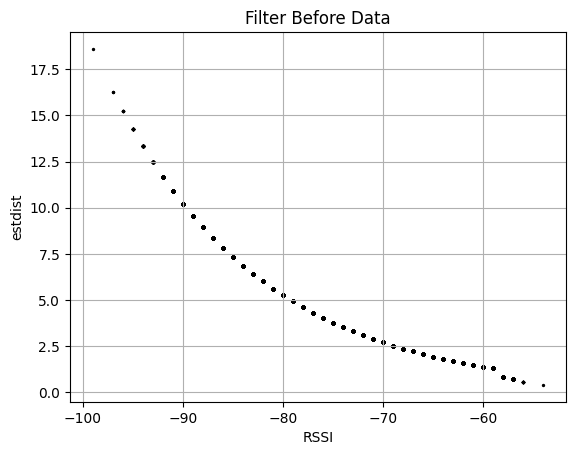

In [5]:
plt.scatter(t_rssi, t_estdist.values.reshape(-1,1), color='k', s=2)
plt.title('Filter Before Data')
plt.xlabel('RSSI')
plt.ylabel('estdist')
plt.grid(True)
plt.show()

### RealDist 실제 거리 그래프

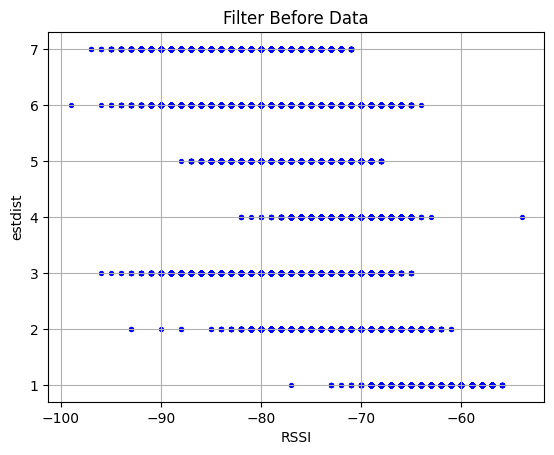

In [6]:
plt.scatter(t_rssi, t_realdist.values.reshape(-1,1), color='b', s=8)
plt.title('Filter Before Data')
plt.xlabel('RSSI')
plt.ylabel('estdist')
plt.grid(True)
plt.show() 

### LinearRegression (실제 / 추정 거리 그래프)

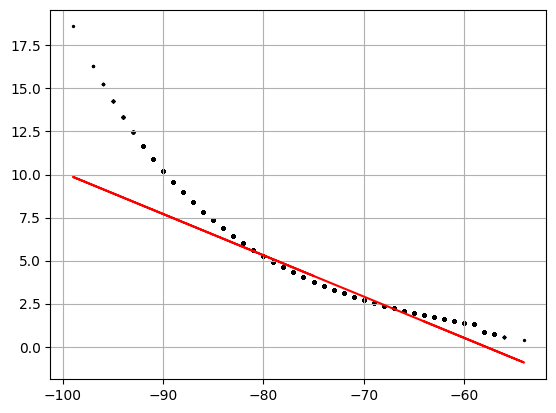

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(t_rssi.values.reshape(-1, 1), t_estdist)
data  = t_rssi.values.reshape(-1,1)
pred = model.predict(data)
plt.scatter(t_rssi, t_estdist.values.reshape(-1, 1), color='k',s=2)
plt.plot(t_rssi, pred, color='red')
plt.grid()
plt.show()

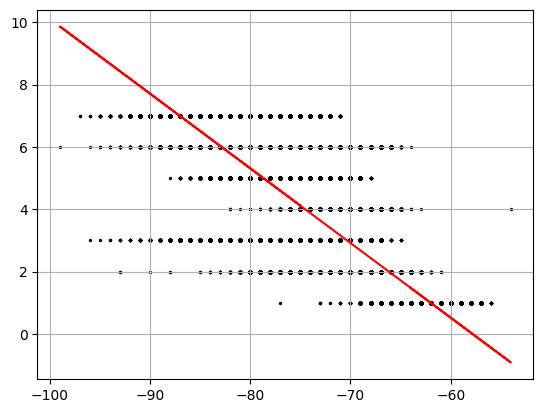

In [9]:
model = LinearRegression()
model.fit(t_rssi.values.reshape(-1,1), t_estdist)
data = t_rssi.values.reshape(-1,1)
pred = model.predict(data)
plt.scatter(t_rssi, t_realdist.values.reshape(-1, 1), color='k',s=2)
plt.plot(t_rssi, pred, color='red')
plt.grid()
plt.show()

### 1초 당 수신되는 Beacon의 개수

In [27]:
# 데이터 불러오기
df = pd.read_csv(path + '/data.csv')

# 'time' 칼럼을 기준으로 Beacon 개수 세기
beacon_counts = df.groupby('time').count()['t_realdist']

# 결과 출력
total_beacon_counts = beacon_counts # 전체 비콘의 개수 합계 구하기
seven_minute_beacon_counts = total_beacon_counts / 7 # 7개 동안 수신된 비콘의 평균 개수 구하기
second_beacon_counts = seven_minute_beacon_counts / 60 # 1초당 수신된 비콘의 평균 개수 구하기

print(total_beacon_counts)



time
2021.11.16 14:20     77
2021.11.16 14:21    364
2021.11.16 14:22    349
2021.11.16 14:23    349
2021.11.16 14:24    366
                   ... 
2021.11.17 6:34     397
2021.11.17 6:35     373
2021.11.17 6:36     392
2021.11.17 6:37     405
2021.11.17 6:38     147
Name: t_realdist, Length: 979, dtype: int64


In [28]:
print(seven_minute_beacon_counts)


time
2021.11.16 14:20    11.000000
2021.11.16 14:21    52.000000
2021.11.16 14:22    49.857143
2021.11.16 14:23    49.857143
2021.11.16 14:24    52.285714
                      ...    
2021.11.17 6:34     56.714286
2021.11.17 6:35     53.285714
2021.11.17 6:36     56.000000
2021.11.17 6:37     57.857143
2021.11.17 6:38     21.000000
Name: t_realdist, Length: 979, dtype: float64


In [29]:
print(second_beacon_counts)


time
2021.11.16 14:20    0.183333
2021.11.16 14:21    0.866667
2021.11.16 14:22    0.830952
2021.11.16 14:23    0.830952
2021.11.16 14:24    0.871429
                      ...   
2021.11.17 6:34     0.945238
2021.11.17 6:35     0.888095
2021.11.17 6:36     0.933333
2021.11.17 6:37     0.964286
2021.11.17 6:38     0.350000
Name: t_realdist, Length: 979, dtype: float64


Original RSSI Values: [-64, -62, -65, -64, -66, -64, -60, -65, -65, -63, -63, -62, -64, -62, -62, -65, -66, -64, -62, -62, -61, -64, -63, -60, -61, -67, -65, -61, -61, -63, -63, -61, -66, -64, -67, -60, -61, -67, -63, -63, -67, -65, -64, -61, -66, -64, -61, -62, -63, -63, -63, -66, -67, -61, -62, -67, -65, -65, -61, -66, -66, -63, -61, -65, -67, -63, -68, -65, -61, -61, -66, -66, -62, -67, -63, -66, -65, -64, -62, -66, -66, -63, -61, -66, -64, -66, -62, -62, -61, -66, -66, -63, -63, -65, -63, -63, -66, -63, -61, -61, -67, -61, -62, -63, -62, -62, -67, -63, -64, -63, -61, -64, -63, -60, -62, -66, -68, -65, -61, -61, -64, -63, -62, -62, -62, -66, -63, -65, -65, -66, -66, -66, -64, -67, -70, -63, -61, -66, -64, -60, -66, -66, -65, -63, -63, -61, -64, -60, -64, -64, -63, -64, -61, -63, -61, -65, -61, -66, -63, -61, -67, -64, -63, -62, -64, -61, -65, -66, -63, -64, -64, -66, -67, -65, -61, -65, -65, -64, -61, -63, -62, -65, -62, -67, -63, -65, -61, -66, -65, -64, -60, -66, -65, -65, -65, -6

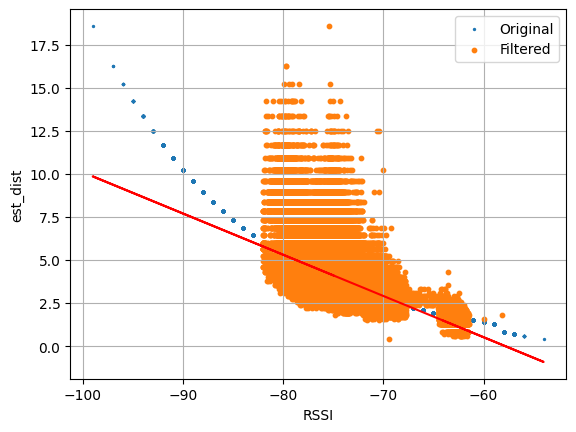

ValueError: Data must be 1-dimensional, got ndarray of shape (63437, 1) instead

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(path + '/data.csv')


class KalmanFilter():
    def __init__(self):
        self.Q = 1e-5  # Process noise covariance
        self.R = 0.1  # Measurement noise covariance
        self.x = 0  # Initial state (RSSI)
        self.P = 1  # Initial state covariance

    def filtering(self, measurement):
        # Prediction
        x_pred = self.x
        P_pred = self.P + self.Q

        # Update
        K = P_pred / (P_pred + self.R)
        self.x = x_pred + K * (measurement - x_pred)
        self.P = (1 - K) * P_pred

        return self.x
def apply_kalman_filter(file_path):
    # Read CSV file into a DataFrame

    # Extract the 'rssi' and 'est_dist' columns from the DataFrame
    rssi_data = []
    est_dist_data = []

    for i in range(414152): # 67650까지 인덱스를 포함하기 위해 67651까지 범위 설정
        rssi_data.append(df.loc[i, 't_rssi'])
        est_dist_data.append(df.loc[i, 't_estdist'])
        rssi_data = df['t_rssi'].tolist()
        est_dist_data = df['t_estdist'].tolist()


    # Kalman filter initialization
    kalman = KalmanFilter()

    # Apply Kalman filter to the RSSI data
    filtered_rssi = [kalman.filtering(rssi) for rssi in rssi_data]

    # Print the number of preprocessed data
    
    # Apply zero padding to the filtered data
    max_len = max(len(rssi_data), len(filtered_rssi))
    #rssi_data = np.pad(rssi_data, (0, max_len - len(rssi_data)), 'constant')
    filtered_rssi = np.pad(filtered_rssi, (0, max_len - len(filtered_rssi)), 'constant')
    #LinearRegression 
    model = LinearRegression()
    model.fit (t_rssi.values.reshape(-1, 1), t_estdist)
    data = t_rssi.values.reshape(-1,1)
    pred = model.predict(data)
    # Output results
    print("Original RSSI Values:", rssi_data)
    print("Filtered (and zero-padded) RSSI Values:", filtered_rssi)
    print("Number of Preprocessed Data:", len(filtered_rssi))
    print("Number of Raw Data:", len(rssi_data))
    # Plotting the data
    plt.scatter(rssi_data, est_dist_data, label='Original',s=2)
    plt.scatter(filtered_rssi, est_dist_data, label='Filtered', s=10)
    #plotting the LinearRegression
    plt.plot(t_rssi, pred,color='red')
    #plot namming
    plt.xlabel('RSSI')
    plt.ylabel('est_dist')
    plt.grid(True)
    #범례
    plt.legend()
    plt.show()
    # Create a DataFrame from the filtered RSSI and estimated distance data
    df_filtered = pd.DataFrame({
        'filtered_rssi': filtered_rssi,
        'est_dist': est_dist_data,
        'txpower' : txpower
    })
    df_rssidata = pd.DataFrame({
        'rssi_data' : rssi_data,
        'est_dist':est_dist_data
    })
  
# Save the DataFrame to a CSV file
    df_filtered.to_csv(file_path + 'filtered_rssi_est_dist.csv', index=False)
    df_rssidata.to_csv(file_path + 'rssidata.csv', index=False)
#
# Specify the correct file path
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
apply_kalman_filter(file_path)

#### 속도 추정 모델 실험 준비
연령별보행 속도 평균 표 <br>
해당 평균 값의 전체 <br>
![alt text](그림1.png)<br>
이번 실험에서 활용한 출발점에서부터 28m 간의 거리와 시간으로 측정한, 연령별 보행속도의 평균에 대한 표. 
해당 평균 값의 전체 평균값인 1.4(m/s) 구하는 코드(1)
이에 1m를 이동하는데 걸리는 시간 구하는 코드(2)


In [1]:
walking_average_sum = 1.3 + 1.4 + 1.49 + 1.35 + 1.41 * 2 + 1.61 + 1.32
print(walking_average_sum)
a = round(walking_average_sum / 8,1) #소수점 첫번째 자리에서 반올림 

print(a)



11.290000000000001
1.4


In [2]:
#28 m 를 이동하는데 걸리는 시간 
b = 28 / 1.4 
print(round(b))
#1m 를 이동하는데 걸리는 시간
c = round(b / 28,1)
print(c)
#반올림


20
0.7


In [3]:
# 7m 이동하는데 걸리는 시간 (수신범위 기준) 
d = c * 14
print(round(d,1))
Max_Beacon_count = d * 1 
print(round(Max_Beacon_count))
Lange_Beacon_count = Max_Beacon_count / 3
print(Lange_Beacon_count)

9.8
10
3.266666666666666


In [1]:
import numpy as np

start = 3
end = 10
num_ranges = 3

# np.linspace 함수는 시작과 끝 값을 포함한 등간격의 숫자를 생성합니다.
boundaries = np.linspace(start, end, num_ranges+1)

ranges = []
for i in range(num_ranges):
    ranges.append((boundaries[i], boundaries[i+1]))

for r in ranges:
    answer = print(f"범위: {r[0]:.2f} - {r[1]:.2f}")
    a,b,c  = input(answer).strip().split('')
    print(a,b,c) 
#a, b = input().strip().split(' ')
#b = int(b)
#answer = a * b
#print(answer)


범위: 3.00 - 5.33
